In [ ]:
 pip install geostatspy

In [ ]:
import geostatspy.GSLIB as GSLIB                       # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                 # GSLIB methods convert to Python

In [ ]:
import os                                               # to set current working directory
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                         # plotting

In [ ]:
current_directory = os.getcwd()                                   # set the working directory
current_directory

'/content'

In [ ]:
df = pd.read_csv(current_directory+"/sample_data_MV_biased.csv")                     # read a .csv file in as a DataFrame
df.head()                                               # we could also use this command for a table preview

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI
0,0,100.0,900.0,0.0,0.101319,1.996868,5590.417154
1,1,100.0,800.0,1.0,0.147676,10.711789,3470.845666
2,2,100.0,700.0,1.0,0.145912,17.818143,3586.988513
3,3,100.0,600.0,1.0,0.186167,217.109365,3732.114787
4,4,100.0,500.0,1.0,0.146088,16.717367,2534.551236


In [ ]:
fraction_data = 0.2                                     # extract a fraction of data for demonstration / faster runs, set to 1.0 for homework
if fraction_data < 1.0:
    df = df.sample(frac = fraction_data,replace = False,random_state = 73073)
df = df.reset_index()
df = df.iloc[:,2:]

df_sand = pd.DataFrame.copy(df[df['Facies'] == 1]).reset_index()  # copy only 'Facies' = sand records
df_shale = pd.DataFrame.copy(df[df['Facies'] == 0]).reset_index() # copy only 'Facies' = shale records
#print(df.iloc[0:5,:])                                  # display first 4 samples in the table as a preview
df.head()                                               # we could also use this command for a table preview

,X,Y,Facies,Porosity,Perm,AI
0,280.0,409.0,1.0,0.136716,17.126888,4728.067903
1,230.0,749.0,1.0,0.204587,1665.384124,3994.709069
2,300.0,500.0,1.0,0.159891,105.797436,3658.811458
3,620.0,389.0,0.0,0.100296,7.578784,6397.384419
4,370.0,689.0,1.0,0.142434,218.419949,5072.154879


In [ ]:
df.describe().transpose()                          # summary table of all facies combined DataFrame statistics
df_sand.describe().transpose()                     # summary table of sand only DataFrame statistics
df_shale.describe().transpose()                    # summary table of shale only DataFrame statistics

,count,mean,std,min,25%,50%,75%,max
index,30.0,36.833333,21.133538,3.000000,19.750000,34.500000,53.750000,73.000000
X,30.0,505.333333,274.461647,70.000000,260.000000,500.000000,777.500000,990.000000
Y,30.0,399.433333,266.244467,19.000000,204.750000,334.000000,639.000000,999.000000
Facies,30.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Porosity,30.0,0.095903,0.017411,0.062169,0.088839,0.099708,0.106937,0.122079
Perm,30.0,3.355391,4.271094,0.300430,0.552129,1.822524,3.126287,17.287735
AI,30.0,5645.391899,1050.244925,3852.669561,4943.656177,5722.539150,6402.165160,7561.250336


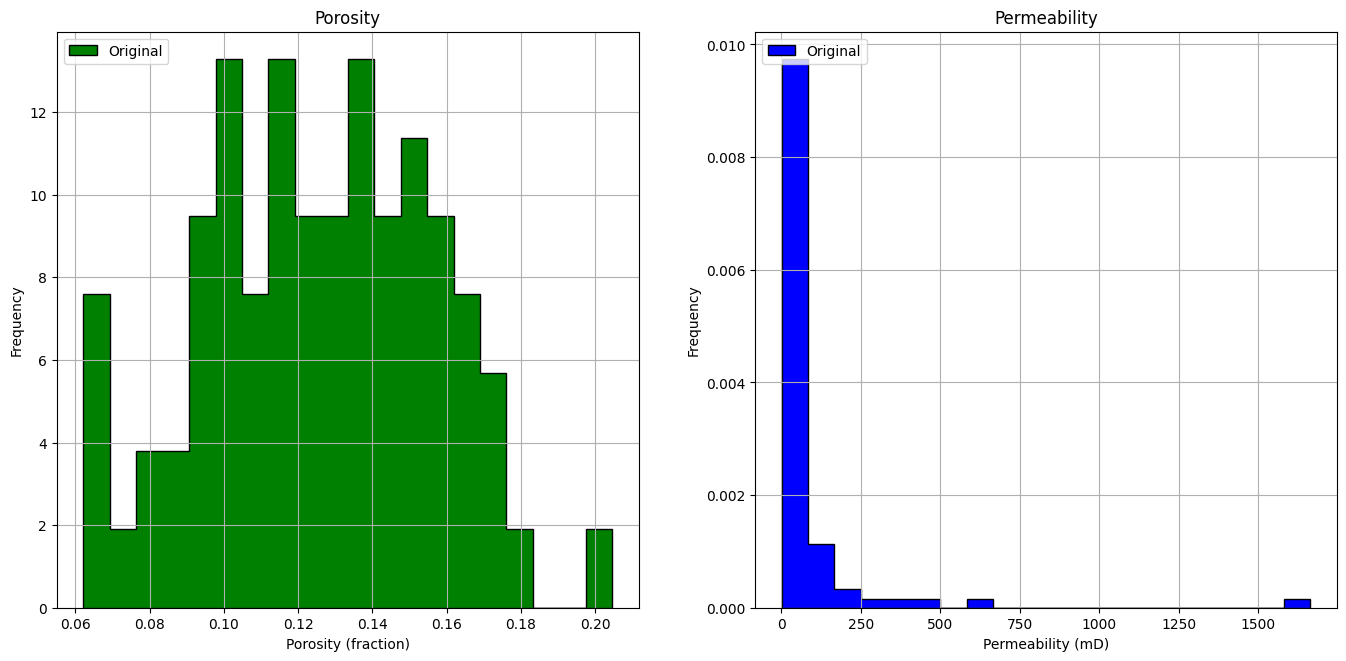

In [ ]:
plt.subplot(121)                                        # plot original sand and shale porosity histograms
plt.hist(df['Porosity'], facecolor='green',bins=20,histtype="stepfilled",alpha=1,density=True,cumulative=False,edgecolor='black',label='Original')

plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(122)                                        # plot nscore transformed sand and shale histograms
plt.hist(df['Perm'], facecolor='blue',bins=20,histtype="stepfilled",alpha=1,density=True,cumulative=False,edgecolor='black',label='Original')

plt.xlabel('Permeability (mD)'); plt.ylabel('Frequency'); plt.title('Permeability')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

<ipython-input-10-5f1973dff2d8>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)
<ipython-input-10-5f1973dff2d8>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(222)


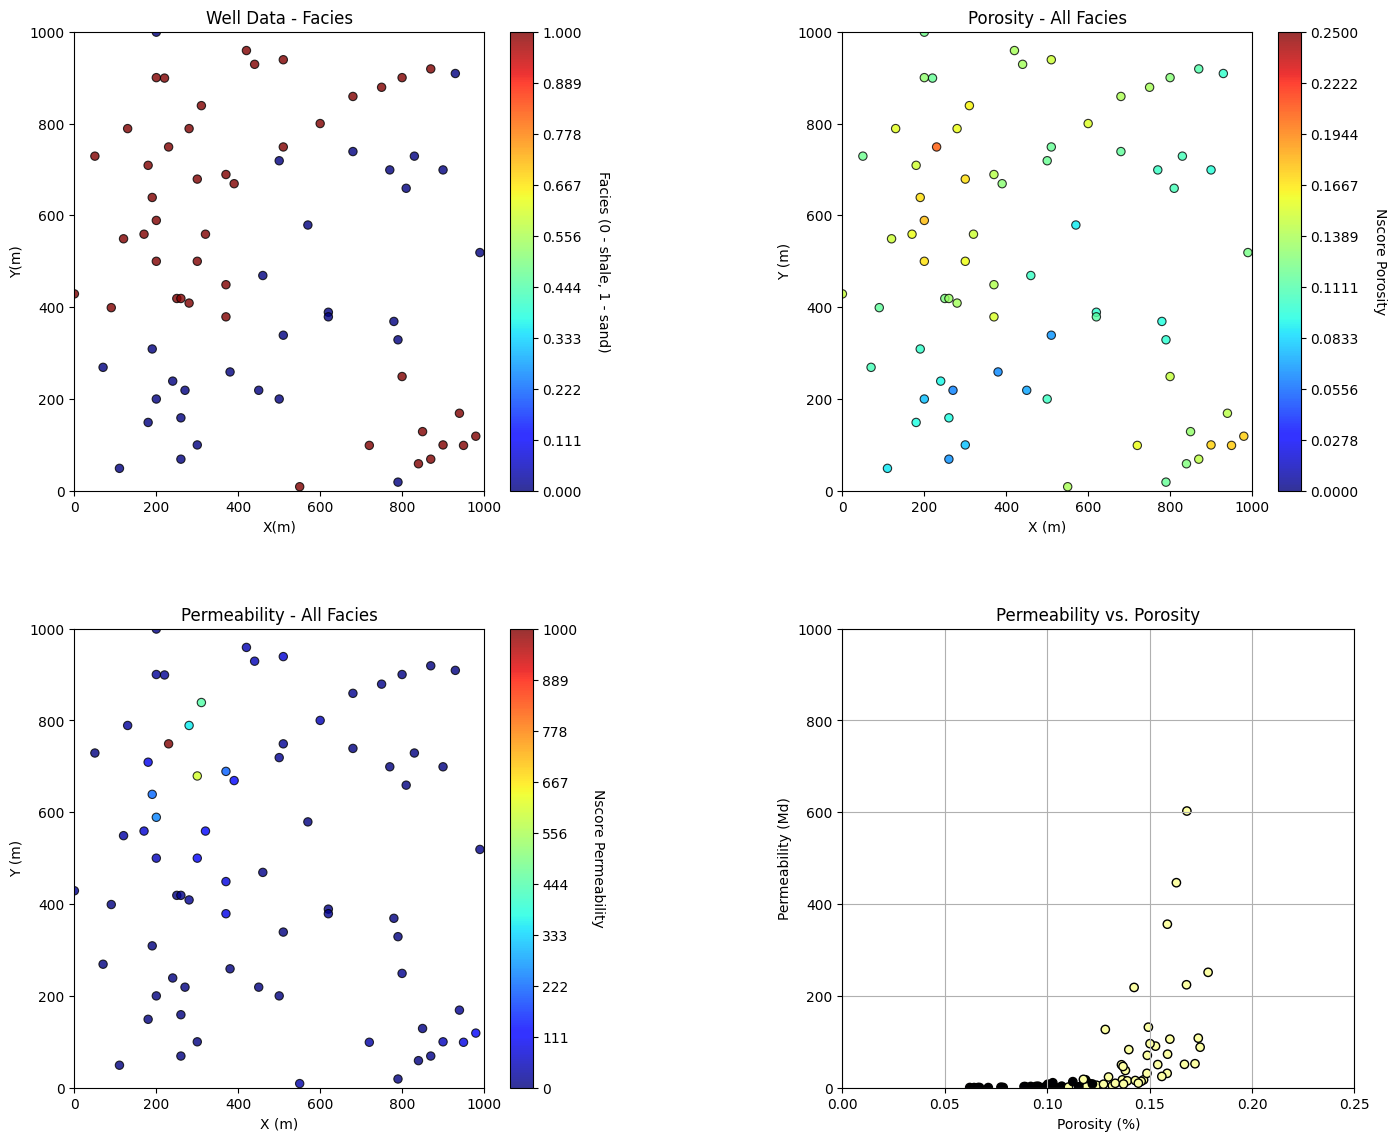

In [ ]:
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values

xsiz = 10; ysiz = 10                    # cell size
nx = 100; ny = 100                      # number of cells
xmn = 5; ymn = 5                        # grid origin, location center of lower left cell

cmap = plt.cm.jet                   # color map
GSLIB.locmap_st(df,'X','Y','Facies',xmin,xmax,ymin,ymax,0,1,'Well Data - Facies','X(m)','Y(m)','Facies (0 - shale, 1 - sand)',cmap)

plt.subplot(221)
GSLIB.locmap_st(df,'X','Y','Facies',xmin,xmax,ymin,ymax,0,1,'Well Data - Facies','X(m)','Y(m)','Facies (0 - shale, 1 - sand)',cmap)

plt.subplot(222)
GSLIB.locmap_st(df,'X','Y','Porosity',0,1000,0,1000,0,0.25,'Porosity - All Facies','X (m)','Y (m)','Nscore Porosity',cmap)

plt.subplot(223)
GSLIB.locmap_st(df,'X','Y','Perm',0,1000,0,1000,0,1000,'Permeability - All Facies','X (m)','Y (m)','Nscore Permeability',cmap)

plt.subplot(224)
facies = df['Facies'].values +0.01
plt.scatter(df['Porosity'],df['Perm'],c = facies,edgecolor = 'black',cmap = plt.cm.inferno)

#plt.plot([-3,3],[-3,3],color = 'black')
plt.xlabel(r'Porosity (%)')
plt.ylabel(r'Permeability (Md)')
plt.title('Permeability vs. Porosity')
plt.xlim([0,0.25])
plt.ylim([0,1000])
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.5, hspace=0.3)
plt.show()

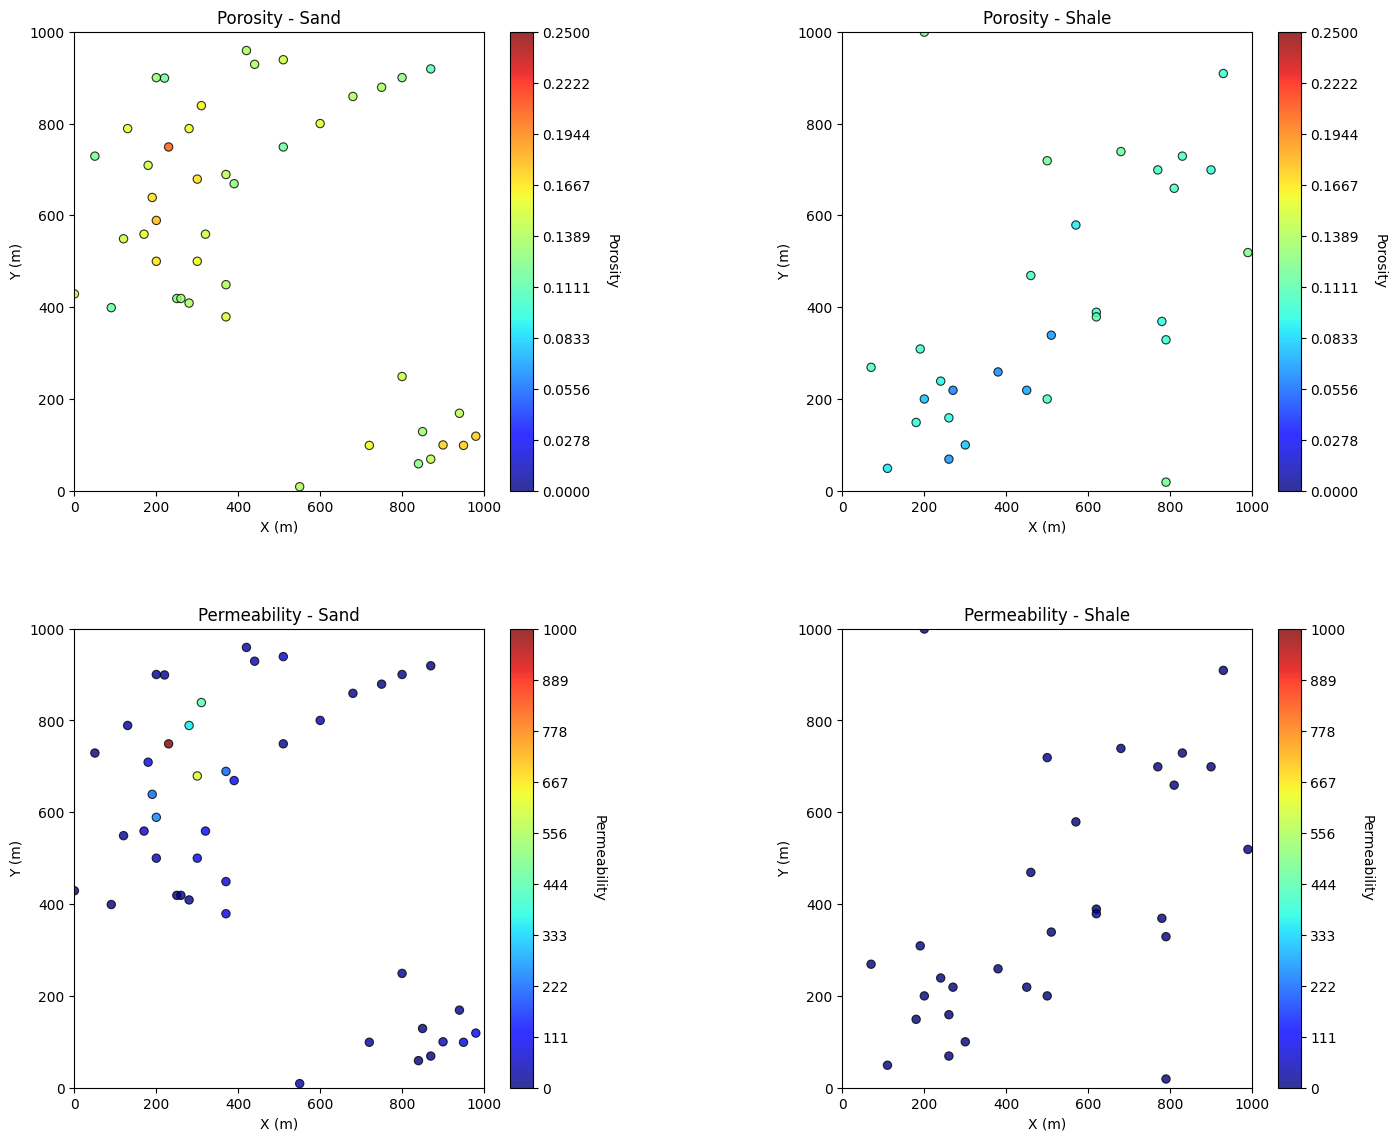

In [ ]:
plt.subplot(221)
GSLIB.locmap_st(df_sand,'X','Y','Porosity',0,1000,0,1000,0,0.25,'Porosity - Sand','X (m)','Y (m)','Porosity',cmap)

plt.subplot(222)
GSLIB.locmap_st(df_shale,'X','Y','Porosity',0,1000,0,1000,0,0.25,'Porosity - Shale','X (m)','Y (m)','Porosity',cmap)

plt.subplot(223)
GSLIB.locmap_st(df_sand,'X','Y','Perm',0,1000,0,1000,0,1000,'Permeability - Sand','X (m)','Y (m)','Permeability',cmap)

plt.subplot(224)
GSLIB.locmap_st(df_shale,'X','Y','Perm',0,1000,0,1000,0,1000,'Permeability - Shale','X (m)','Y (m)','Permeability',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.5, hspace=0.3)
plt.show()

**Indicator Kriging for Facies**

In [ ]:
nxdis = 1; nydis = 1                       # block kriging discretizations, 1 for point kriging
ndmin = 0; ndmax = 40                      # minimum and maximum data for kriging
radius = 500                               # maximum search distance
ktype = 0                                  # kriging type, 0 - simple, 1 - ordinary
ivtype = 0                                 # variable type, 0 - categorical, 1 - continuous
tmin = -999; tmax = 999;                   # data trimming limits

In [ ]:
ncut = 2                                   # number of facies
thresh = [0,1]                             # the facies categories
gcdf = [0.4,0.6]                           # the global proportions of the categories
varios = []                                # the variogram list
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=500,hmin1=500)) # shale indicator variogram
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=500,hmin1=500)) # sand indicator variogram

Data for ik2d: Variable column Facies
  Number   = 74
Setting up rotation matrices for variogram and search
Working on the kriging
   currently on estimate 0
   currently on estimate 1000
   currently on estimate 2000
   currently on estimate 3000
   currently on estimate 4000
   currently on estimate 5000
   currently on estimate 6000
   currently on estimate 7000
   currently on estimate 8000
   currently on estimate 9000


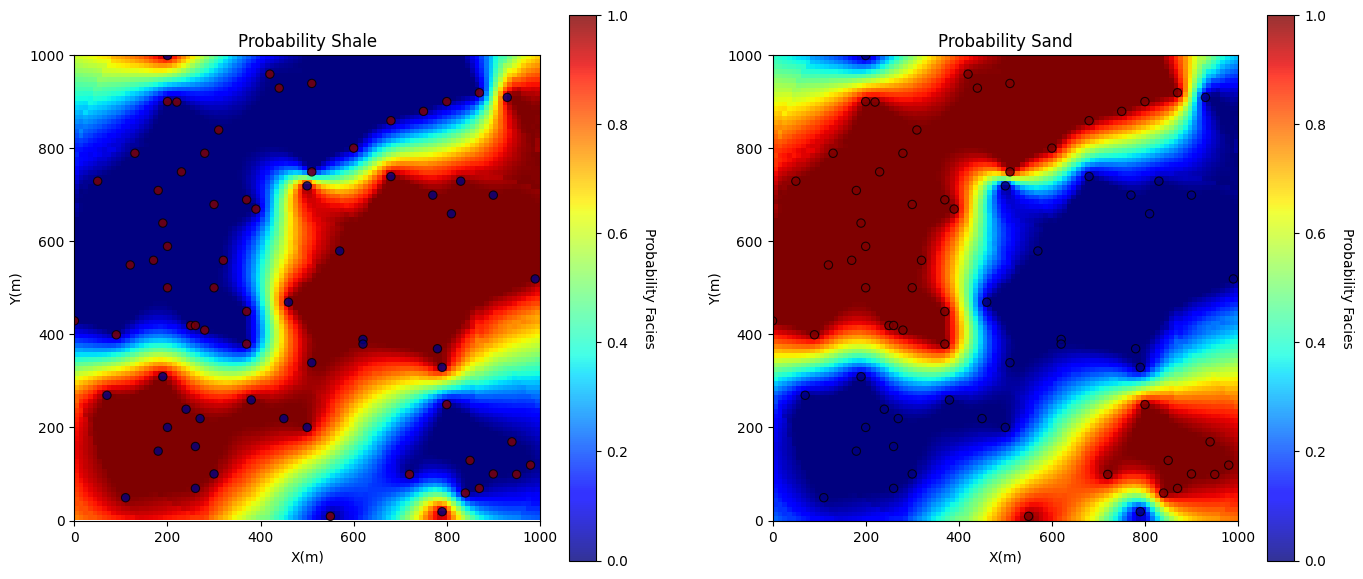

In [ ]:
no_trend = np.zeros((1,1))                  # null ndarray not of correct size so ik2d will not use a trend - will fix this
ikmap = geostats.ik2d(df,'X','Y','Facies',ivtype,0,2,thresh,gcdf,no_trend,tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz, ndmin,ndmax,radius,ktype,vario=varios)

plt.subplot(221)
GSLIB.locpix_st(ikmap[:,:,0],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,df,'X','Y','Facies','Probability Shale','X(m)','Y(m)','Probability Facies',cmap)
plt.subplot(222)
GSLIB.locpix_st(ikmap[:,:,1],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,df,'X','Y','Facies','Probability Sand','X(m)','Y(m)','Probability Facies',cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()

In [ ]:
skmean_por = 0.10; skmean_perm = 65.0      # simple kriging mean (used if simple kriging is selected below)
ktype = 0                                  # kriging type, 0 - simple, 1 - ordinary
radius = 300                               # search radius for neighbouring data
nxdis = 1; nydis = 1                       # number of grid discretizations for block kriging (not tested)
ndmin = 0; ndmax = 40                      # minimum and maximum data for an estimate
tmin = 0.0                                 # minimum property value
por_vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=45,hmaj1=300,hmin1=300) # porosity variogram

100%|██████████| 100/100 [00:09<00:00, 10.48it/s]


  Estimated   10000 blocks 
      average   0.11811465397054349  variance  0.0006000202795742905


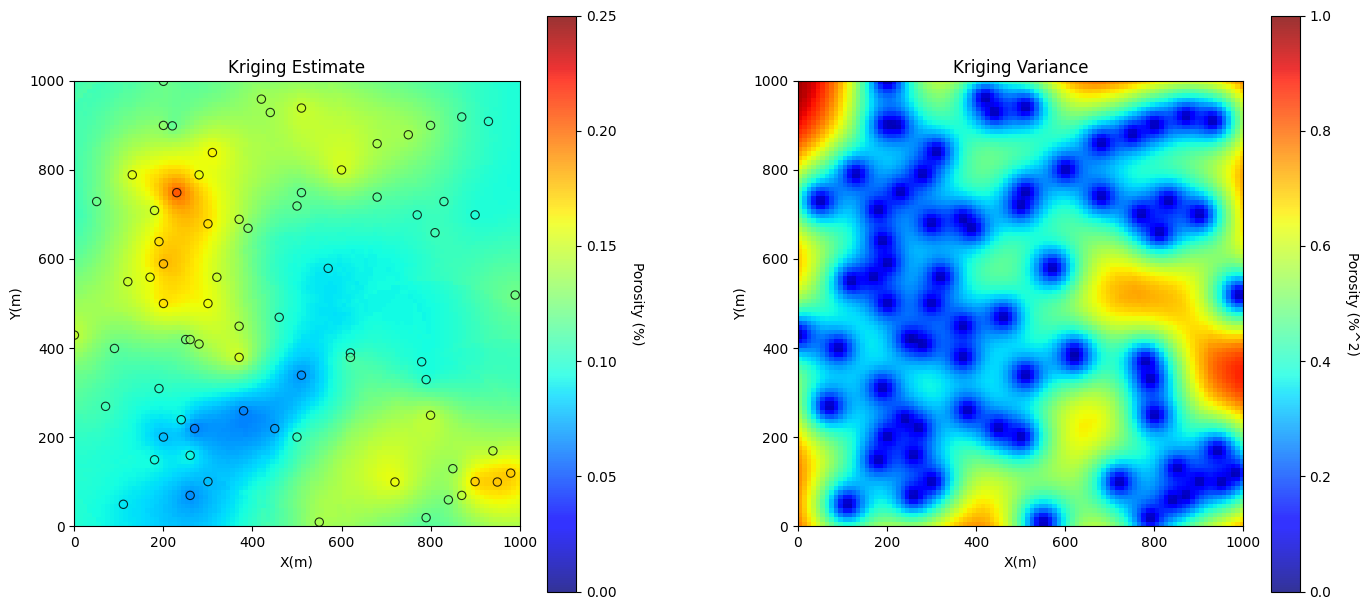

In [ ]:
por_kmap, por_vmap = geostats.kb2d(df,'X','Y','Porosity',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,nxdis,nydis,
         ndmin,ndmax,radius,ktype,skmean_por,por_vario)

# perm_kmap, perm_vmap = geostats.kb2d(df,'X','Y','Perm',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,nxdis,nydis,
#          ndmin,ndmax,radius,ktype,skmean_perm,por_vario)

plt.subplot(121)
GSLIB.locpix_st(por_kmap,xmin,xmax,ymin,ymax,xsiz,0.0,0.25,df,'X','Y','Porosity','Kriging Estimate','X(m)','Y(m)','Porosity (%)',cmap)

plt.subplot(122)
GSLIB.pixelplt_st(por_vmap,xmin,xmax,ymin,ymax,xsiz,0.0,1.0,'Kriging Variance','X(m)','Y(m)','Porosity (%^2)',cmap)

# plt.subplot(223)
# GSLIB.locpix_st(perm_kmap,xmin,xmax,ymin,ymax,xsiz,0.0,1000,df,'X','Y','Perm','Kriging Estimate','X(m)','Y(m)','Permeability (mD)',cmap)

# plt.subplot(224)
# GSLIB.pixelplt_st(perm_vmap,xmin,xmax,ymin,ymax,xsiz,0.0,1.0,'Kriging Variance','X(m)','Y(m)','Permeability (mD^2)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.3, hspace=0.3)
plt.show()

In [ ]:
skmean_por_sand = 0.10; skmean_por_shale = 0.08
skmean_perm_sand = 3.0; skmean_perm_shale = 0.5

por_sand_vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=500,hmin1=500) # porosity sand variogram
por_shale_vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=500,hmin1=500) # porosity shale variogram

# perm_sand_vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=100,hmin1=100) # perm sand variogram
# perm_shale_vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=10,hmin1=10) # perm shale variogram

facies_kmap = np.zeros((ny,nx)); por_kmap = np.zeros((ny,nx)); perm_kmap = np.zeros((ny,nx)) # declare array to combine values

100%|██████████| 100/100 [00:04<00:00, 24.60it/s]


  Estimated   10000 blocks 
      average   0.13047612897254046  variance  0.00031954238741582763


100%|██████████| 100/100 [00:03<00:00, 30.66it/s]


  Estimated   10000 blocks 
      average   0.09894517270299366  variance  0.00012543322496455858


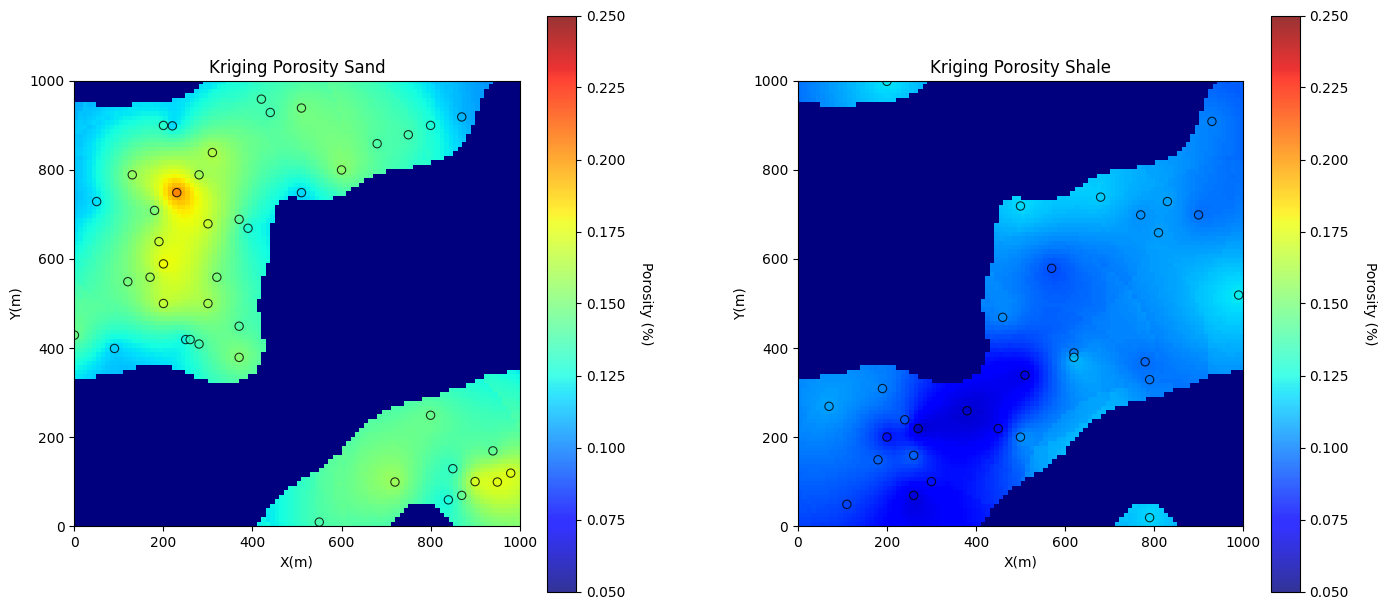

In [ ]:
por_sand_kmap, por_sand_vmap = geostats.kb2d(df_sand,'X','Y','Porosity',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,nxdis,nydis,
         ndmin,ndmax,radius,ktype,skmean_por_sand,por_sand_vario)


por_shale_kmap, por_shale_vmap = geostats.kb2d(df_shale,'X','Y','Porosity',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,nxdis,nydis,
         ndmin,ndmax,radius,ktype,skmean_por_shale,por_shale_vario)

for iy in range(0,ny):
    for ix in range(0,nx):
        if ikmap[iy,ix,1] > 0.5:   # current location is assumed to be sand
            facies_kmap[iy,ix] = 1
            por_kmap[iy,ix] = por_sand_kmap[iy,ix];
#            perm_kmap[iy,ix] = perm_sand_kmap[iy,ix];
            por_shale_kmap[iy,ix] = -1
#            perm_shale_kmap[iy,ix] = -1
        else:                      # current location is assumed to be shale
            facies_kmap[iy,ix] = 0
            por_kmap[iy,ix] = por_shale_kmap[iy,ix];
#            perm_kmap[iy,ix] = perm_shale_kmap[iy,ix];
            por_sand_kmap[iy,ix] = -1
#            perm_sand_kmap[iy,ix] = -1

plt.subplot(121)
GSLIB.locpix_st(por_sand_kmap,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df_sand,'X','Y','Porosity','Kriging Porosity Sand','X(m)','Y(m)','Porosity (%)',cmap)

plt.subplot(122)
GSLIB.locpix_st(por_shale_kmap,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df_shale,'X','Y','Porosity','Kriging Porosity Shale','X(m)','Y(m)','Porosity (%)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.3, hspace=0.3)
plt.show()


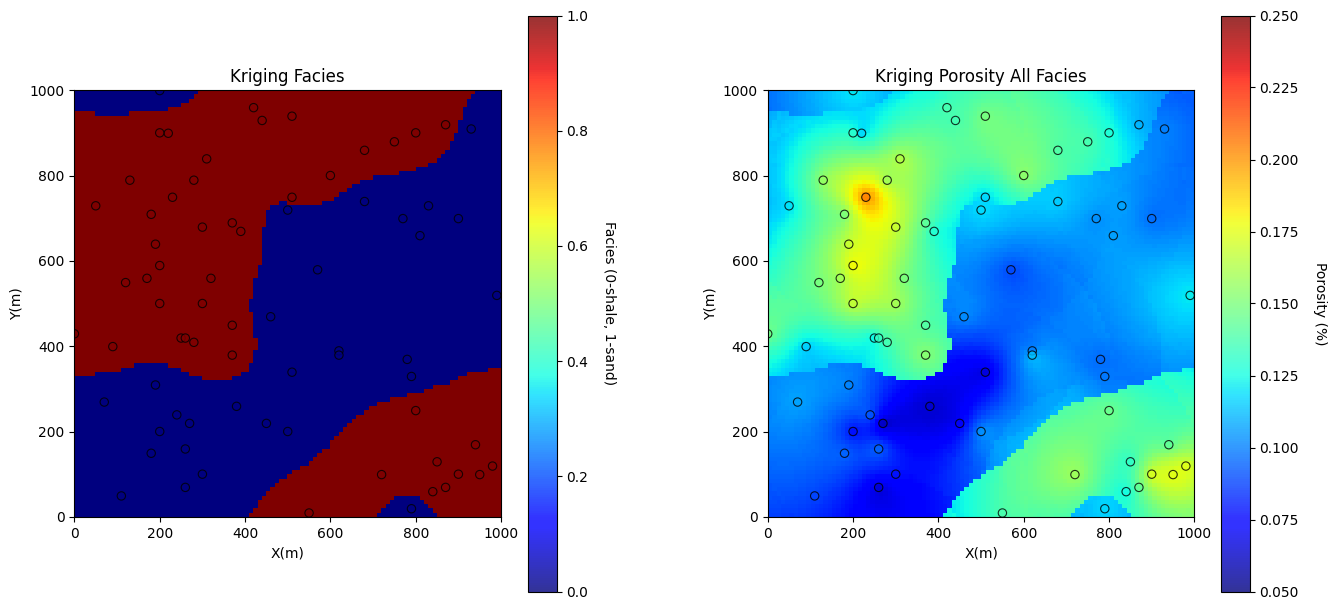

In [ ]:
plt.subplot(131)
GSLIB.locpix_st(facies_kmap,xmin,xmax,ymin,ymax,xsiz,0,1,df,'X','Y','Facies','Kriging Facies','X(m)','Y(m)','Facies (0-shale, 1-sand)',cmap)

plt.subplot(132)
GSLIB.locpix_st(por_kmap,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Kriging Porosity All Facies','X(m)','Y(m)','Porosity (%)',cmap)

# plt.subplot(133)
# GSLIB.locpix_st(perm_kmap,xmin,xmax,ymin,ymax,xsiz,0.0,1000,df,'X','Y','Perm','Kriging Permeability All Facies','X(m)','Y(m)','Porosity (%)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.3, hspace=0.3)
plt.show()

**Assignment**

**Question 1**

In [ ]:

import os

image_path = "image_path"
results_path = "results_path"

os.makedirs(image_path, exist_ok=True)
os.makedirs(results_path, exist_ok=True)

**Question 2**

In [ ]:
import matplotlib.backends.backend_pdf


def save_plot(plt, filename):
    image_path = "image_path"
    results_path = "results_path"

    os.makedirs(image_path, exist_ok=True)
    os.makedirs(results_path, exist_ok=True)

    png_filename = os.path.join(image_path, filename + ".png")
    pdf_filename = os.path.join(results_path, filename + ".pdf")

    plt.savefig(png_filename, dpi=300)

    pdf = matplotlib.backends.backend_pdf.PdfPages(pdf_filename)
    pdf.savefig(plt.gcf())
    pdf.close()


plt.show()
save_plot(plt, "Porosity_Permeability_Histograms")


plt.show()
save_plot(plt,"Facies_Location_Map")


plt.show()
save_plot(plt, "Facies_Probability_Maps")


plt.show()
save_plot(plt, "Kriging_Estimates_and_Variance")


plt.show()
save_plot(plt,"Conditional_Simulation_Results")


plt.show()
save_plot(plt,"Final_Kriging_Results")

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

**Question 5**

In [ ]:
import pandas as pd
import os

# Create a DataFrame for the results
results_df = pd.DataFrame({
    'X': np.ravel(np.array([np.linspace(xmn + xsiz * 0.5, xmn + xsiz * (nx - 0.5), nx)] * ny)),
    'Y': np.ravel(np.array([np.linspace(ymn + ysiz * 0.5, ymn + ysiz * (ny - 0.5), ny)] * nx).T),
    'por_kmap': np.ravel(por_kmap),
    'por_vmap': np.ravel(por_vmap)
})


os.makedirs(results_path, exist_ok=True)

csv_filepath = os.path.join(results_path, 'kriging_results.csv')

# Export the data to a CSV file
results_df.to_csv(csv_filepath, index=False)

**Question 6**

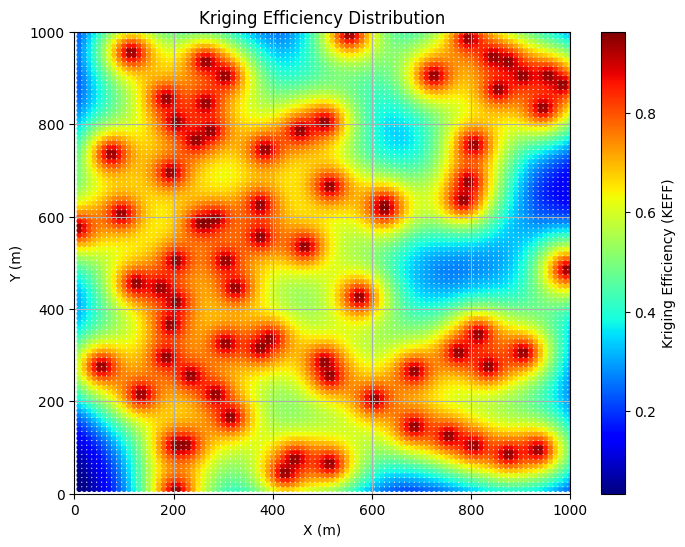

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


results_path = "results_path"
csv_filepath = os.path.join(results_path, 'kriging_results.csv')


try:
    results_df = pd.read_csv(csv_filepath)
except FileNotFoundError:
    print(f"Error: File not found at {csv_filepath}. Please run the previous code block to generate the results file.")
    exit()

# Calculate Kriging Efficiency
bvar = 1
results_df['KEFF'] = (bvar - results_df['por_vmap']) / bvar

# Create the 2D spatial plot of KEFF
xmin = 0.0; xmax = 1000.0
ymin = 0.0; ymax = 1000.0
xsiz = 10; ysiz = 10

plt.figure(figsize=(8, 6))
plt.scatter(results_df['X'], results_df['Y'], c=results_df['KEFF'], cmap='jet', s=10)
plt.colorbar(label='Kriging Efficiency (KEFF)')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Kriging Efficiency Distribution')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.grid(True)
plt.show()


# Save the plot
def save_plot(plt, filename):
    image_path = "image_path"
    results_path = "results_path"

    os.makedirs(image_path, exist_ok=True)
    os.makedirs(results_path, exist_ok=True)

    png_filename = os.path.join(image_path, filename + ".png")
    pdf_filename = os.path.join(results_path, filename + ".pdf")

    plt.savefig(png_filename, dpi=300)

    pdf = matplotlib.backends.backend_pdf.PdfPages(pdf_filename)
    pdf.savefig(plt.gcf())
    pdf.close()

save_plot(plt, "Kriging_Efficiency_Map")

**Question 7**

Kriging is generally more accurate than IDW (Inverse Distance Weighting) interpolation because it considers both distance and the relationship between data points, not just distance alone. While IDW relies on distance alone and can produce “bullseye” effects, especially at higher powers, Kriging uses a statistical model called a variogram to capture patterns in the data more precisely. This model helps Kriging make better predictions, especially when the data has clear spatial patterns or trends. So, if the data shows strong spatial relationships, Kriging is the best choice for accurate and reliable interpolation.